## Exploratory Data Analysis – Banking Dataset

The objective of this notebook is to perform exploratory data analysis (EDA) on a banking customer dataset to understand customer demographics, financial behavior, and product usage. The insights derived here will guide feature engineering and support the creation of an interactive Power BI dashboard.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the banking dataset
df = pd.read_csv("Banking.csv")

# Preview the dataset
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [3]:
# Check number of rows and columns
df.shape

# View column names
df.columns

# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [4]:
# Check for missing values
df.isnull().sum()

# Check for duplicate rows
df.duplicated().sum()

# Check number of unique values per column
df.nunique()

Client ID                   2940
Name                        2913
Age                           69
Location ID                 2890
Joined Bank                 2579
Banking Contact               49
Nationality                    5
Occupation                   195
Fee Structure                  3
Loyalty Classification         4
Estimated Income            3000
Superannuation Savings      2997
Amount of Credit Cards         3
Credit Card Balance         2996
Bank Loans                  2973
Bank Deposits               2967
Checking Accounts           2967
Saving Accounts             2967
Foreign Currency Account    3000
Business Lending            2987
Properties Owned               4
Risk Weighting                 5
BRId                           4
GenderId                       2
IAId                          22
dtype: int64

In [5]:
# Standardize column names for consistency and ease of use
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', '_', regex=True)
)

# Verify updated column names
df.columns

Index(['client_id', 'name', 'age', 'location_id', 'joined_bank',
       'banking_contact', 'nationality', 'occupation', 'fee_structure',
       'loyalty_classification', 'estimated_income', 'superannuation_savings',
       'amount_of_credit_cards', 'credit_card_balance', 'bank_loans',
       'bank_deposits', 'checking_accounts', 'saving_accounts',
       'foreign_currency_account', 'business_lending', 'properties_owned',
       'risk_weighting', 'brid', 'genderid', 'iaid'],
      dtype='object')

In [6]:
# Convert joined_bank to datetime format
#df['joined_bank'] = pd.to_datetime(df['joined_bank'], errors='coerce')

df['joined_bank'] = pd.to_datetime(df['joined_bank'], format='%d-%m-%Y')
print(df['joined_bank'].dtype)

# Verify conversion
df[['joined_bank']].head()

datetime64[ns]


,joined_bank
0,2019-05-06
1,2001-12-10
2,2010-01-25
3,2019-03-28
4,2012-07-20


In [7]:
# Calculate customer tenure in years
df['customer_tenure_years'] = (
    pd.Timestamp.now().year - df['joined_bank'].dt.year
)

df[['joined_bank', 'customer_tenure_years']].head()

,joined_bank,customer_tenure_years
0,2019-05-06,7
1,2001-12-10,25
2,2010-01-25,16
3,2019-03-28,7
4,2012-07-20,14


In [8]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

numerical_cols, categorical_cols

(Index(['age', 'location_id', 'estimated_income', 'superannuation_savings',
        'amount_of_credit_cards', 'credit_card_balance', 'bank_loans',
        'bank_deposits', 'checking_accounts', 'saving_accounts',
        'foreign_currency_account', 'business_lending', 'properties_owned',
        'risk_weighting', 'brid', 'genderid', 'iaid'],
       dtype='object'),
 Index(['client_id', 'name', 'banking_contact', 'nationality', 'occupation',
        'fee_structure', 'loyalty_classification'],
       dtype='object'))

In [9]:
# Summary statistics for numerical variables
df[numerical_cols].describe()

# Summary for categorical variables
df[categorical_cols].describe()

,client_id,name,banking_contact,nationality,occupation,fee_structure,loyalty_classification
count,3000,3000,3000,3000,3000,3000,3000
unique,2940,2913,49,5,195,3,4
top,IND48103,Raymond Mills,Ernest Rivera,European,Structural Analysis Engineer,High,Jade
freq,3,2,77,1309,28,1476,1331


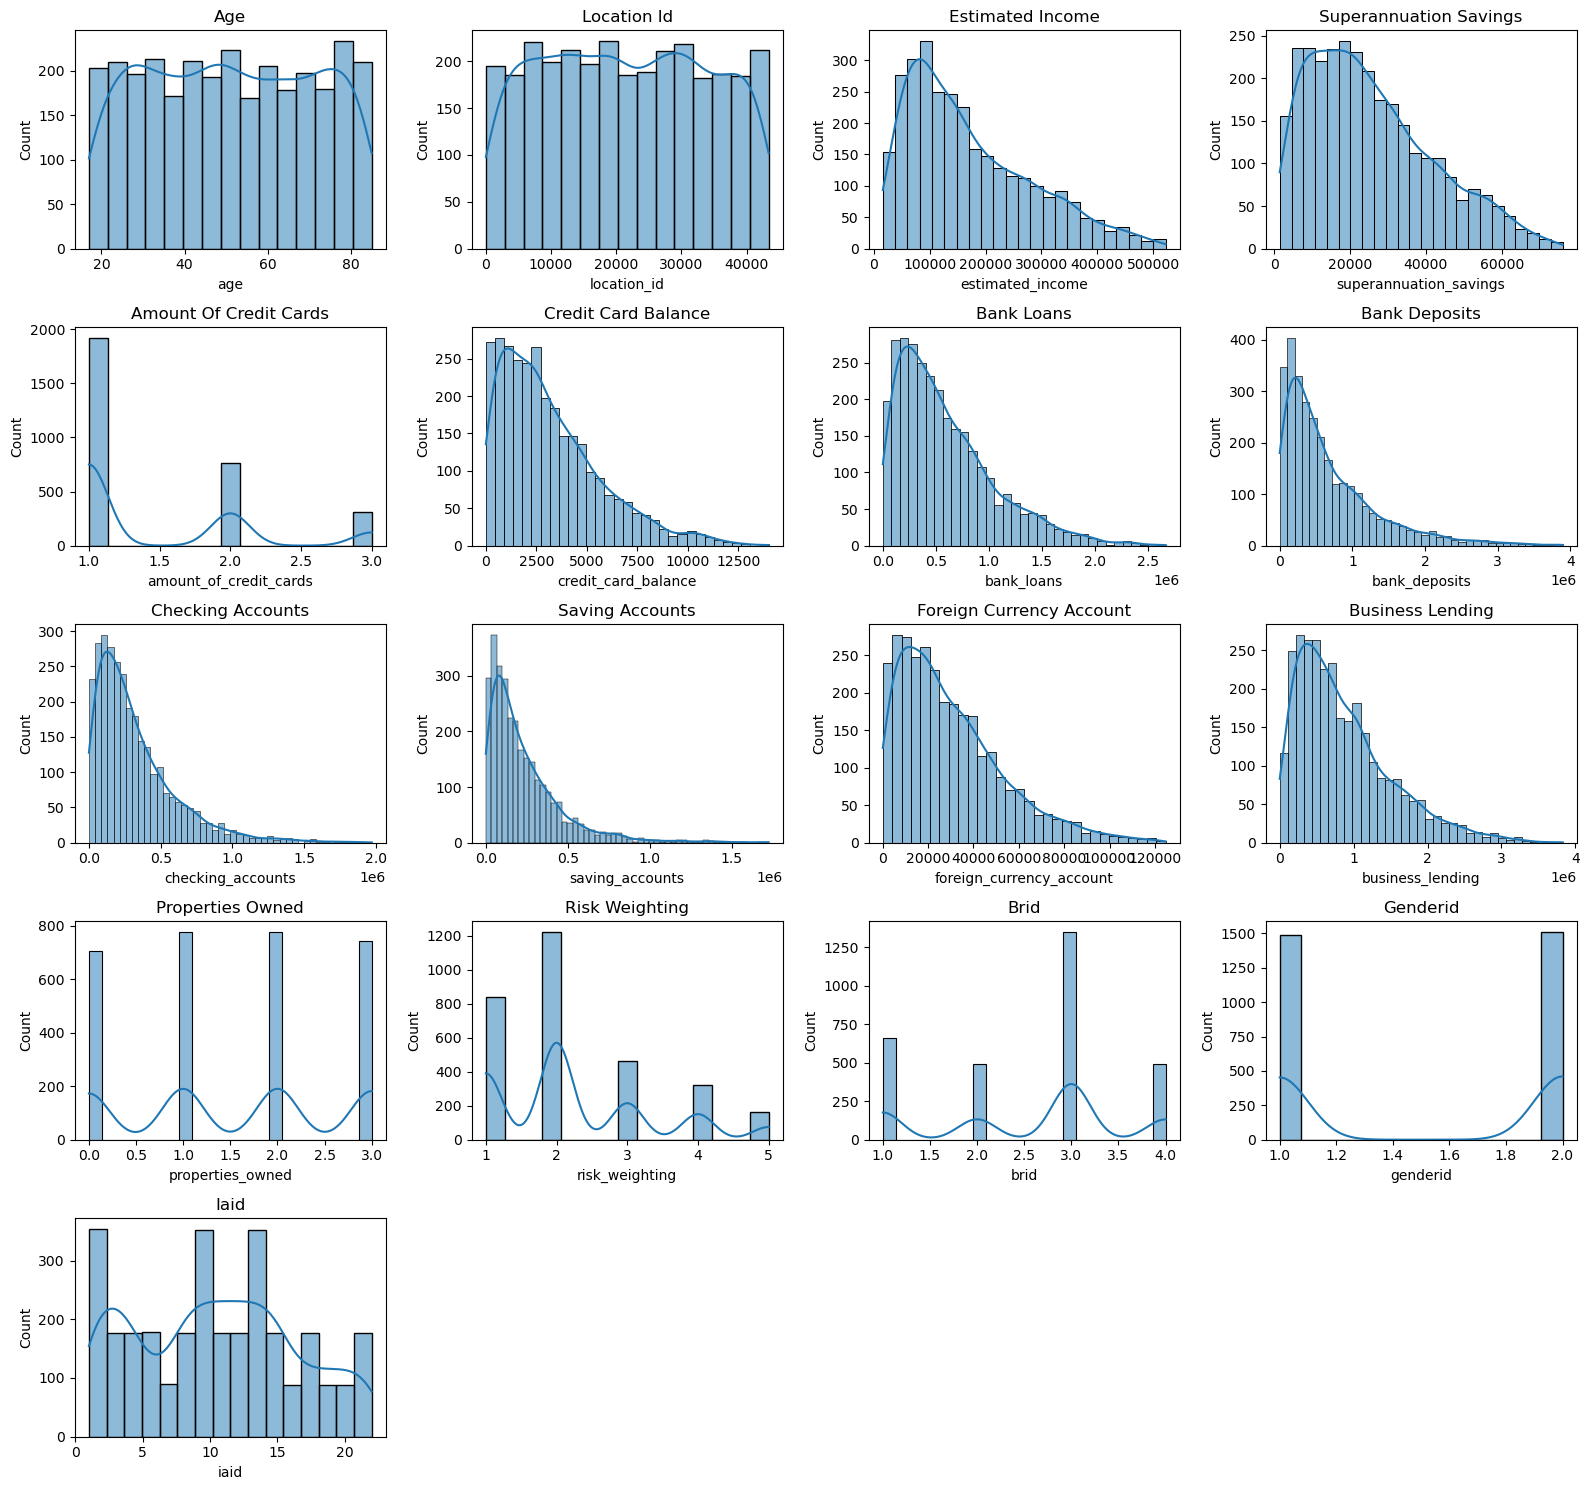

In [10]:
# Number of numerical columns
num_cols = len(numerical_cols)

# Define number of columns per row
cols = 4
rows = (num_cols + cols - 1) // cols  # dynamic row calculation

plt.figure(figsize=(cols * 4, rows * 3))

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()

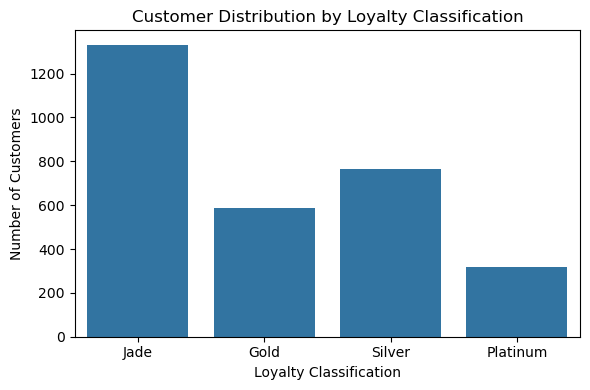

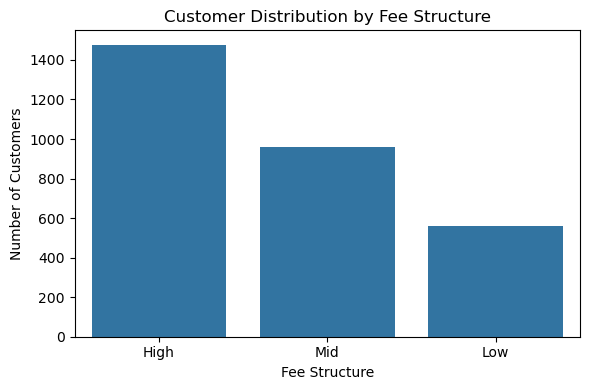

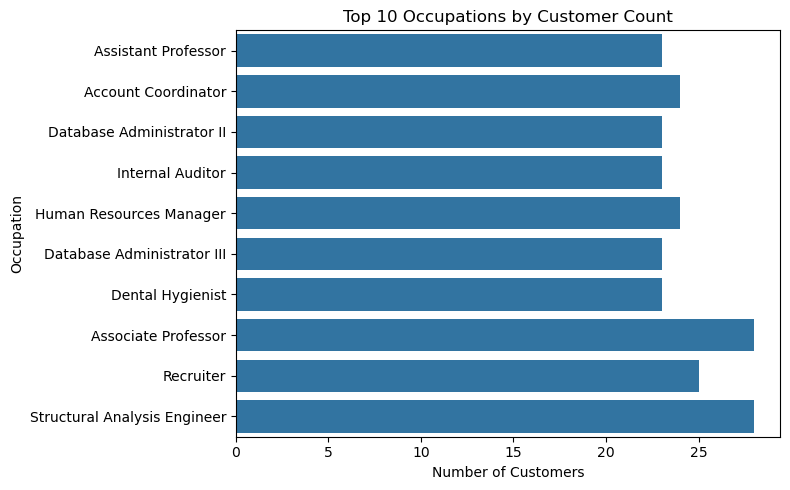

In [11]:
categorical_cols = [
    'loyalty_classification',
    'fee_structure',
    'occupation'
]

#Loyalty Classification
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='loyalty_classification')
plt.title('Customer Distribution by Loyalty Classification')
plt.xlabel('Loyalty Classification')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

#Fee Structure
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='fee_structure')
plt.title('Customer Distribution by Fee Structure')
plt.xlabel('Fee Structure')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

#Occupation
top_occupations = df['occupation'].value_counts().head(10).index

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df[df['occupation'].isin(top_occupations)],
    y='occupation'
)
plt.title('Top 10 Occupations by Customer Count')
plt.xlabel('Number of Customers')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()


Note: Categorical variables were analyzed individually to avoid visual clutter. Only business-relevant categories were explored, and high-cardinality variables were limited to top categories for clarity.


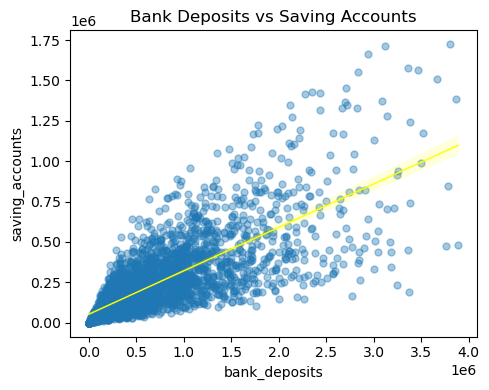

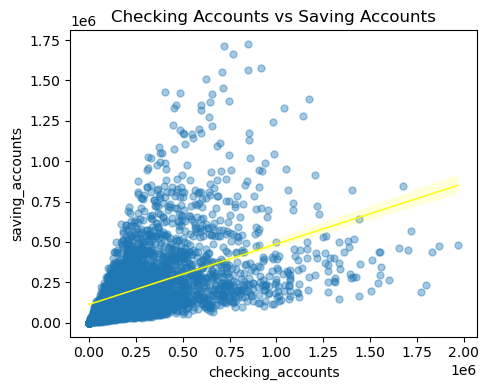

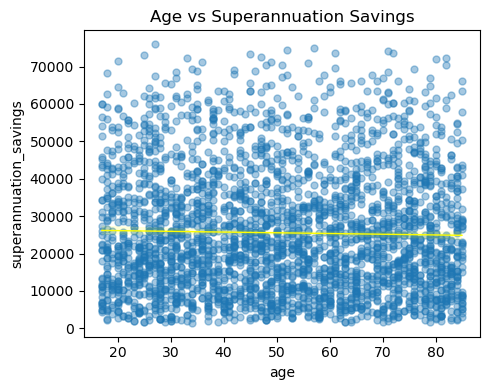

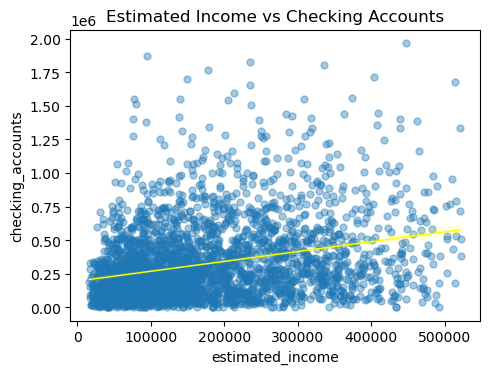

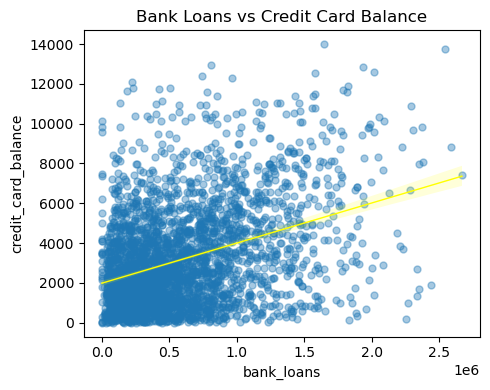

In [12]:
# Relationships between key financial variables
pairs_to_plot = [
    ('bank_deposits', 'saving_accounts'),
    ('checking_accounts', 'saving_accounts'),
    ('age', 'superannuation_savings'),
    ('estimated_income', 'checking_accounts'),
    ('bank_loans', 'credit_card_balance')
]

for x_col, y_col in pairs_to_plot:
    plt.figure(figsize=(5, 4))
    sns.regplot(
        data=df,
        x=x_col,
        y=y_col,
        scatter_kws={'alpha': 0.4, 's': 25},
        line_kws={'linewidth': 1,
                 'color' : 'yellow'}
    )
    plt.title(f'{x_col.replace("_"," ").title()} vs {y_col.replace("_"," ").title()}')
    plt.tight_layout()
    plt.show()

In [13]:
# Create total assets
df['total_assets'] = (
    df['bank_deposits'] +
    df['saving_accounts'] +
    df['checking_accounts'] +
    df['foreign_currency_account']
)

# Create total liabilities
df['total_liabilities'] = (
    df['bank_loans'] +
    df['credit_card_balance'] +
    df['business_lending']
)

# Calculate net worth
df['net_worth'] = df['total_assets'] - df['total_liabilities']

df[['total_assets', 'total_liabilities', 'net_worth']].head()

,total_assets,total_liabilities,net_worth
0,2709028.94,1911202.76,797826.18
1,1276801.63,3273398.41,-1996596.78
2,1968202.41,1605422.16,362780.25
3,2388513.65,1273802.35,1114711.30
4,1092790.37,2726493.56,-1633703.19


In [14]:
# Export the processed dataset for dashboard creation
df.to_csv("processed_banking_data.csv", index=False)

## 🔍 Final Insights from Exploratory Data Analysis

The exploratory data analysis (EDA) was conducted to understand the structure, quality, and key patterns within the banking customer dataset and to prepare the data for dashboard development. The following insights summarize the findings from univariate and bivariate analysis.

---

### 1️⃣ Data Quality & Structure
- The dataset contains 3,000 customer records with no missing or duplicate values.
- All numerical and categorical variables were well-defined and suitable for analysis.
- Column names were standardized to ensure consistency and ease of use across Python and Power BI.

---

### 2️⃣ Customer Demographics & Income Patterns
- Customer ages are broadly distributed, with a higher concentration in the mid-age range.
- Estimated income is right-skewed, indicating that most customers fall into lower to mid-income ranges, while a smaller segment represents high-income individuals.
- Age and income do not show a strong linear relationship, suggesting income is influenced by factors beyond age alone.

---

### 3️⃣ Asset Holding Behavior
- Positive relationships exist between bank deposits, checking accounts, and saving accounts, indicating that customers who actively save tend to maintain balances across multiple account types.
- Superannuation savings increase with age, reflecting long-term financial planning behavior.
- Foreign currency accounts are held by a smaller subset of customers, likely representing more financially active or internationally exposed clients.

---

### 4️⃣ Liability and Credit Usage Patterns
- Bank loans and credit card balances show a positive relationship, suggesting that customers with higher borrowing capacity tend to use multiple credit products.
- Business lending is strongly associated with higher bank loan values, highlighting a distinct segment of business-oriented customers with higher credit exposure.
- The number of credit cards held does not necessarily translate to higher balances, indicating controlled credit usage for most customers.

---

### 5️⃣ Income vs Product Engagement
- Higher-income customers generally maintain higher balances in checking and saving accounts.
- However, increased income does not always result in proportionally higher liabilities, indicating varied financial strategies and risk appetites among customers.
- Income-based segmentation is effective for identifying high-value customer groups.

---

### 6️⃣ Categorical Insights
- Loyalty classification shows clear customer segmentation, making it a strong candidate for dashboard filtering.
- Fee structure distribution highlights opportunities for differentiated pricing and loyalty-based incentives.
- A small number of occupations dominate the customer base, providing potential targets for focused product offerings.

---

### 7️⃣ Implications for Dashboard Design
- Total assets, total liabilities, and net worth are key metrics for customer value analysis.
- Income, loyalty classification, and risk weighting are effective dimensions for segmentation.
- Relationships between assets and liabilities provide meaningful insights for both business and risk stakeholders.

---

## ✅ Conclusion

The EDA provided a clear understanding of customer financial behavior, highlighting patterns in income, asset accumulation, credit usage, and loyalty segmentation. These insights validate the readiness of the dataset for dashboard development and form a strong analytical foundation for building an interactive Power BI dashboard focused on customer profiling, risk assessment, and strategic decision-making.